## クラスタリング

クラスタリング手法の多くはフラットクラスタリング（flat clustering）と階層的クラスタリング（hierachical clustering）に該当する。

フラットクラスタリングは、クラスタ間の関係性は考慮せずに、データをクラスタに分類する。

* すべてのデータがどこか一つのクラスタに属するように分割する
* 他のクラスタのデータとは類似しないようにする
* 前もってクラスタの数を決める必要がある

階層的クラスタリングは、クラスタを階層構造に組み立てる。

* クラスタの数を指定する必要はない
* 類似性の高いデータをクラスタとしてグループ化するが、さらに似ているクラスタをまとめて親クラスタにする
* 再帰的に処理することで、クラスタが1つになるまで繰り返す

Scikitではクラスタリングのための手法をたくさん提供していて、それぞれの手法について利点や欠点などの概要を知ることができる。

> 2.3. Clustering — scikit-learn 0.17.1 documentation  
> http://scikit-learn.org/dev/modules/clustering.html

### KMeans

KMeansはフラットクラスタリングの中でも最も広く使われているアルゴリズムである。クラスタの数を示す*num_clusters*を指定して初期化を行う。指定した数の文だけ、中心点（セントロイド(centroid)）を持つ。

1. *num_clusters*で指定した数のデータを任意に選び出し、その特徴ベクトルを中心とする。
2. 選ばれなかったデータについて、最も近い中心点を持つクラスタを、そのデータのクラスタとする。
3. 各クラスタについて、その中心点の位置データを更新する。
4. 中心点の更新方法は、クラスタに所属するデータすべてを対象にして、それらの特徴ベクトルの平均を、そのクラスタの中心点とする。
5. 中心点の移動距離が閾値を下回れば、クラスタリング処理が収束したと考える。

ここで、2つの単語からなる文書の集合を利用して、KMeansアルゴリズムがどのような振る舞いをするのか確認してみる。

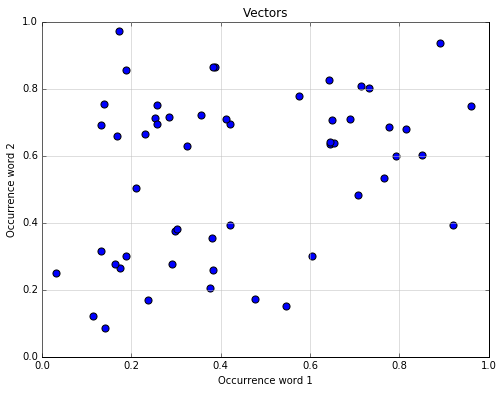

In [1]:
%matplotlib inline
import scipy as sp
from scipy.stats import norm
from matplotlib import pylab
from sklearn.cluster import KMeans

seed = 2
sp.random.seed(seed)  # to reproduce the data later on

num_clusters = 3

def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    pylab.figure(num=None, figsize=(8, 6))
    if km:
        pylab.scatter(x, y, s=50, c=km.predict(list(zip(x, y))))
    else:
        pylab.scatter(x, y, s=50)

    pylab.title(title)
    pylab.xlabel("Occurrence word 1")
    pylab.ylabel("Occurrence word 2")

    pylab.autoscale(tight=True)
    pylab.ylim(ymin=0, ymax=1)
    pylab.xlim(xmin=0, xmax=1)
    pylab.grid(True, linestyle='-', color='0.75')

    return pylab


xw1 = norm(loc=0.3, scale=.15).rvs(20)
yw1 = norm(loc=0.3, scale=.15).rvs(20)

xw2 = norm(loc=0.7, scale=.15).rvs(20)
yw2 = norm(loc=0.7, scale=.15).rvs(20)

xw3 = norm(loc=0.2, scale=.15).rvs(20)
yw3 = norm(loc=0.8, scale=.15).rvs(20)

x = sp.append(sp.append(xw1, xw2), xw3)
y = sp.append(sp.append(yw1, yw2), yw3)

i = 1
plot_clustering(x, y, "Vectors")

i += 1

KMeansのループ処理を行ったときの動作を見てみることにする。

1. 3つの特徴ベクトルを初期位置として任意に選ぶ。
2. 各データを一番近い中心点のクラスタに設定する。
3. クラスタの中心点をそのクラスタに所属する店の平均点として更新する。

Initialization complete
Iteration  0, inertia 4.749


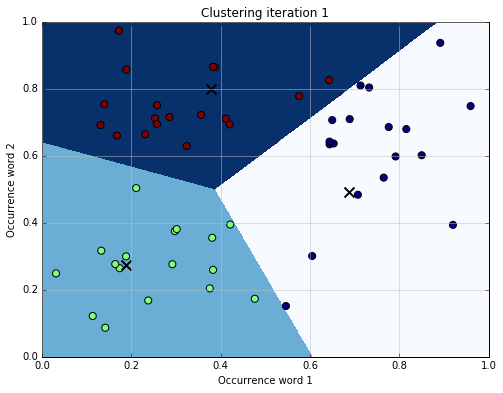

In [2]:
# 1 iteration ####################
mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))

km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=1,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)ｂ

plot_clustering(x, y, "Clustering iteration 1", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c1a, c1b, c1c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

i += 1

クラスタの中心が動くので、再度クラスタのラベル付けをおこなって、クラスタの中心を計算し直す必要がある。

Initialization complete
Iteration  0, inertia 4.749
Iteration  1, inertia 3.379


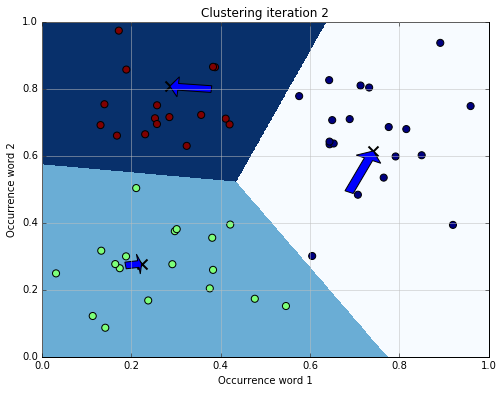

In [3]:
# 2 iterations ####################
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=2,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 2", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c2a, c2b, c2c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

pylab.gca().add_patch(
    pylab.Arrow(c1a[0], c1a[1], c2a[0] - c1a[0], c2a[1] - c1a[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1b[0], c1b[1], c2b[0] - c1b[0], c2b[1] - c1b[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1c[0], c1c[1], c2c[0] - c1c[0], c2c[1] - c1c[1], width=0.1))

i += 1

矢印はクラスタの中心の変移を示している。ループ処理を繰り返すと、クラスタの中心は動かなくなる。

Initialization complete
Iteration  0, inertia 4.749
Iteration  1, inertia 3.379
Iteration  2, inertia 2.600
Iteration  3, inertia 2.497
Iteration  4, inertia 2.447
Converged at iteration 4


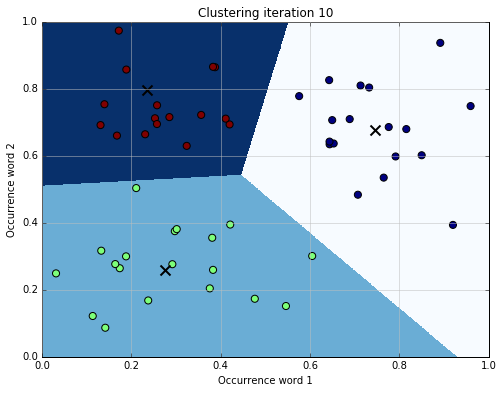

In [4]:
# 3 iterations ####################
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=10,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 10", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
i += 1

Note：KMeansオブジェクトのコンストラクタに*verbose=False*を渡すと表示が消える。

クラスタリングの処理が終わると、クラスタの中心点とそのラベルだけを記憶する必要がある。新しい文書が入力されると、

1. その文書をベクトル化する。
2. すべてのクラスタの中心点と比較する。
3. 最も距離の小さいクラスタの中心点を探す。
4. そのクラスタを新しい文書のクラスタとする。

### テストデータを用いて評価を行う

クラスタリングの評価を行うため、「技術」をテーマとした文書を使って、アルゴリズムが期待通り分類できているかを評価したい。

ここでは[20newsgroup](http://qwone.com/~jason/20Newsgroups/)を利用する。データセットは[20news-18828.tar.gz](http://mlcomp.org/datasets/379)をダウンロードしてくる。中にはニュースグループから集められた文書が入っている。技術系を扱うグループだけを対象として、各ニュースグループが各文書に属するクラスタであると見なすことができる。これで各文書の正解となるラベル（クラスタ）とできるため、評価の確認とすることができる。

データセットの中身にtrainとtestが含まれているが、全データの60%がtrain、40%がtestに分けられている。*mlcomp_root*にデータセットがあるディレクトリのパスを指定してから読み込みを行う。

In [8]:
import sklearn.datasets
MLCOMP_DIR = "sample_newsgroups"

data = sklearn.datasets.load_mlcomp("20news-18828", mlcomp_root=MLCOMP_DIR)
# print(data.filenames)
# print(len(data.filenames))

訓練データとテストデータは次のように読み込む。

In [14]:
train_data = sklearn.datasets.load_mlcomp("20news-18828", "train", mlcomp_root=MLCOMP_DIR)
print("Train Data: %d" % len(train_data.filenames))

test_data = sklearn.datasets.load_mlcomp("20news-18828", "test", mlcomp_root=MLCOMP_DIR)
print("Test Data: %d" % len(test_data.filenames))

Train Data: 13180
Test Data: 5648


ここでは、いくつかのニュースグループに限定して分析を行っていく。

In [17]:
groups = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'sci.space']
train_data = sklearn.datasets.load_mlcomp("20news-18828", "train", mlcomp_root=MLCOMP_DIR, categories=groups)
print(len(train_data.filenames))

4119


### 文書のクラスタリング

文書をベクトル化するとき、不適切な文字を無視したりと、ノイズをクリーニングする必要がある。

In [1]:
import sys
sys.path.append("~/.python_conf")

import notebook_importing
# import ch03module

vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5, stop_words='english', charset_error='ignore')

SyntaxError: Missing parentheses in call to 'exec' (notebook_importing.py, line 63)